# Import Packages

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics function
from scipy.stats import skew

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mounting from Google Drive
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Import data
telco_data = pd.read_csv('drive/My Drive/Telco Data/Telco.csv')
#Check data head
telco_data.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check data info
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [5]:
#Check Total Charges
telco_data[telco_data['TotalCharges'] == " "]

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Germany,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Germany,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Germany,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Germany,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Germany,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Germany,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Germany,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Germany,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Germany,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Germany,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
#Change TotalCharges data from " " to 0
telco_data['TotalCharges'] = telco_data['TotalCharges'].apply(lambda x : 0 if x==" " else x)

In [7]:
#Change TotalCharges data type to Float
telco_data['TotalCharges'] = telco_data['TotalCharges'].astype(float)

In [8]:
#Check telco_data info
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [9]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telco_data.nunique()[telco_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telco_data.columns if x not in cat_cols + target_col + Id_col]

In [10]:
cat_cols

['Region',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [11]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

# Basic Statistics

In [12]:
#Summary statistics
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Region 

In [13]:
#Check value counts from Region
telco_data['Region'].value_counts()

Germany    6761
France      194
England      88
Name: Region, dtype: int64

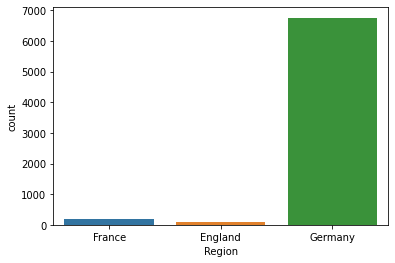

In [14]:
#Visualize the Region with countplot
sns.countplot(data=telco_data,x='Region')

**Churn**

In [15]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
print('No   :', round(telco_data['Churn'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes  :', round(telco_data['Churn'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No   : 73.46 % of the dataset
Yes  : 26.54 % of the dataset


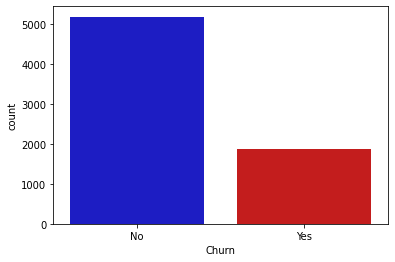

In [17]:
#Visualize the gender with countplot
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='Churn',palette=colors)

**Gender**

In [18]:
telco_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
print('Male   :', round(telco_data['gender'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Female :', round(telco_data['gender'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

Male   : 50.48 % of the dataset
Female : 49.52 % of the dataset


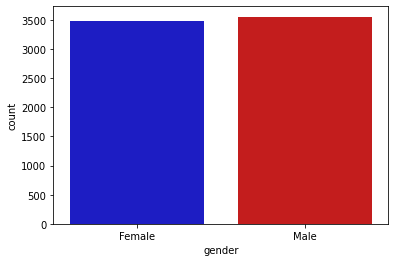

In [20]:
#Visualize the gender with countplot
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='gender',palette=colors)

**Senior Citizen**

In [21]:
telco_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
print('0 :', round(telco_data['SeniorCitizen'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('1 :', round(telco_data['SeniorCitizen'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

0 : 83.79 % of the dataset
1 : 16.21 % of the dataset


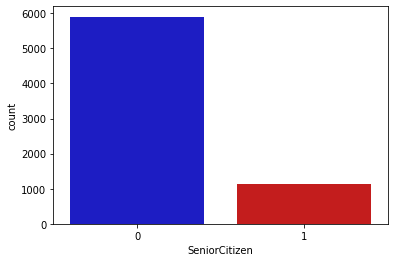

In [23]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='SeniorCitizen',palette=colors)

**Partner**

In [24]:
telco_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
print('No  :', round(telco_data['Partner'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['Partner'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 51.7 % of the dataset
Yes : 48.3 % of the dataset


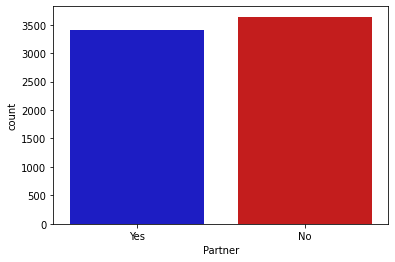

In [26]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='Partner',palette=colors)

**Dependent**

In [27]:
telco_data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [28]:
print('No  :', round(telco_data['Dependents'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['Dependents'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 70.04 % of the dataset
Yes : 29.96 % of the dataset


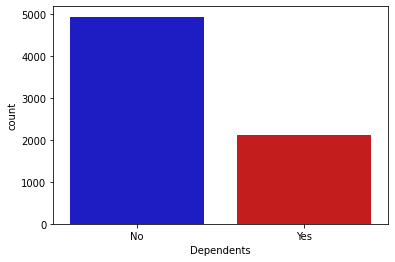

In [29]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='Dependents',palette=colors)

**Phone** **Service**

In [30]:
telco_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [31]:
print('Yes  :', round(telco_data['PhoneService'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('No :', round(telco_data['PhoneService'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

Yes  : 90.32 % of the dataset
No : 9.68 % of the dataset


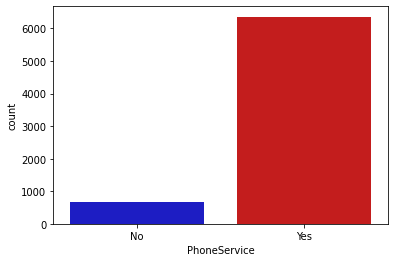

In [32]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='PhoneService',palette=colors)

Multiple lines

In [33]:
telco_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [34]:
#Change value of data
telco_data['MultipleLines'] = telco_data['MultipleLines'].str.replace('No phone service','No')

In [35]:
telco_data['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [36]:
print('No  :', round(telco_data['MultipleLines'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['MultipleLines'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 57.82 % of the dataset
Yes : 42.18 % of the dataset


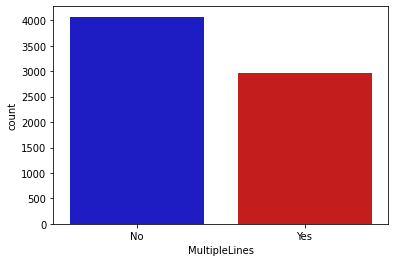

In [37]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='MultipleLines',palette=colors)

Internet Services

In [38]:
telco_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [39]:
def ratio_feature(df, by, target, on):
    
    by_target_ratio = pd.DataFrame(telco_data.groupby([by, target])[on].count()).reset_index()
    by_target_ratio = by_target_ratio.pivot(index=by, columns=target, values=on).reset_index()
    by_target_ratio = by_target_ratio.fillna(0)
    by_target_ratio['{}_chrun_ratio'.format(by)] = (by_target_ratio.iloc[:,2] / (by_target_ratio.iloc[:,1]+by_target_ratio.iloc[:,2])).round(4)
    by_target_ratio = by_target_ratio.iloc[:, lambda by_target_ratio: [0, -1]]
    
    return by_target_ratio

In [40]:
internet_service_type = ratio_feature(telco_data, 'InternetService', 'Churn', 'customerID')
internet_service_type

Churn,InternetService,InternetService_chrun_ratio
0,DSL,0.1896
1,Fiber optic,0.4189
2,No,0.0740


In [41]:
telco_data['InternetService'] = telco_data['InternetService'].str.replace('Fiber optic','Yes').str.replace('DSL','Yes')

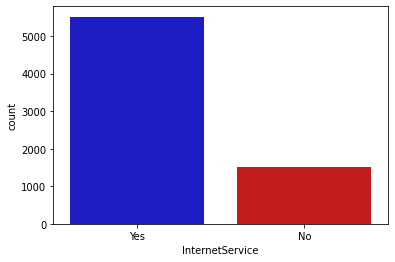

In [42]:
colors = ["#0101DF", "#DF0101","#34495e"]
sns.countplot(data=telco_data,x='InternetService',palette=colors)

Online Security

In [43]:
telco_data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [44]:
telco_data['OnlineSecurity'] = telco_data['OnlineSecurity'].str.replace('No internet service','No')

In [45]:
print('No  :', round(telco_data['OnlineSecurity'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['OnlineSecurity'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 71.33 % of the dataset
Yes : 28.67 % of the dataset


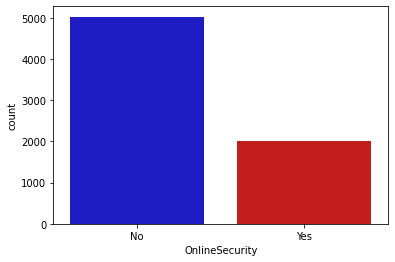

In [46]:
colors = ["#0101DF", "#DF0101","#34495e"]
sns.countplot(data=telco_data,x='OnlineSecurity',palette=colors)

**Online Backup**

In [47]:
telco_data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [48]:
telco_data['OnlineBackup'] = telco_data['OnlineBackup'].str.replace('No internet service','No')

In [49]:
print('No  :', round(telco_data['OnlineSecurity'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['OnlineSecurity'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 71.33 % of the dataset
Yes : 28.67 % of the dataset


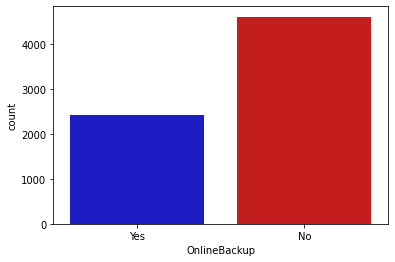

In [50]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='OnlineBackup',palette=colors)

**Device Protection**


In [51]:
telco_data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [52]:
telco_data['DeviceProtection'] = telco_data['DeviceProtection'].str.replace('No internet service','No')

In [53]:
print('No  :', round(telco_data['DeviceProtection'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['DeviceProtection'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 65.61 % of the dataset
Yes : 34.39 % of the dataset


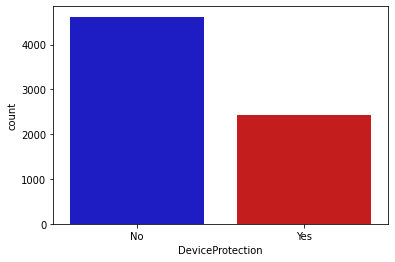

In [54]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='DeviceProtection',palette=colors)

**Tech** **Support** 

In [55]:
telco_data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [56]:
telco_data['TechSupport'] = telco_data['TechSupport'].str.replace('No internet service','No')

In [57]:
print('No  :', round(telco_data['DeviceProtection'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['DeviceProtection'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 65.61 % of the dataset
Yes : 34.39 % of the dataset


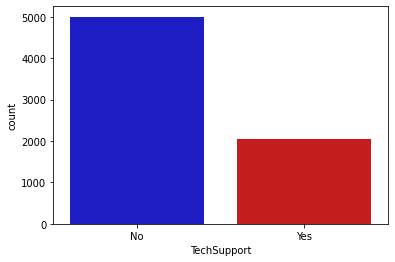

In [58]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='TechSupport',palette=colors)

**Streaming TV**

In [59]:
telco_data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [60]:
telco_data['StreamingTV'] = telco_data['StreamingTV'].str.replace('No internet service','No')

In [61]:
print('No  :', round(telco_data['StreamingTV'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['StreamingTV'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 61.56 % of the dataset
Yes : 38.44 % of the dataset


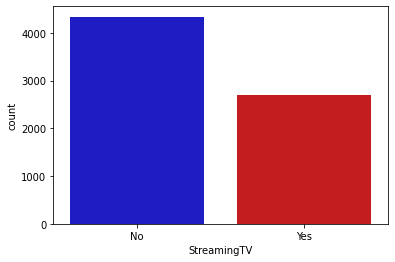

In [62]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='StreamingTV',palette=colors)

Streaming Movies

In [63]:
telco_data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [64]:
telco_data['StreamingMovies'] = telco_data['StreamingMovies'].str.replace('No internet service','No')

In [65]:
print('No  :', round(telco_data['StreamingTV'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('Yes :', round(telco_data['StreamingTV'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

No  : 61.56 % of the dataset
Yes : 38.44 % of the dataset


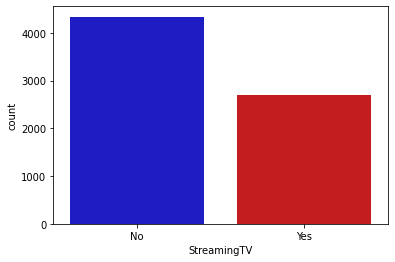

In [66]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='StreamingTV',palette=colors)

**Contract**

In [67]:
telco_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [68]:
contract_type = ratio_feature(telco_data, 'Contract', 'Churn', 'customerID')
contract_type

Churn,Contract,Contract_chrun_ratio
0,Month-to-month,0.4271
1,One year,0.1127
2,Two year,0.0283


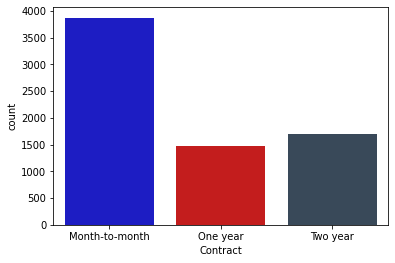

In [69]:
colors = ["#0101DF", "#DF0101","#34495e"]
sns.countplot(data=telco_data,x='Contract',palette=colors)

**Paperless Billing**

In [70]:
telco_data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [71]:
print('Yes  :', round(telco_data['PaperlessBilling'].value_counts()[0]/len(telco_data) * 100,2), '% of the dataset')
print('No   :', round(telco_data['PaperlessBilling'].value_counts()[1]/len(telco_data) * 100,2), '% of the dataset')

Yes  : 59.22 % of the dataset
No   : 40.78 % of the dataset


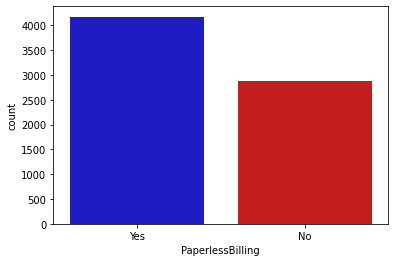

In [72]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(data=telco_data,x='PaperlessBilling',palette=colors)

**Payment Method**

In [73]:
telco_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [74]:
payment_method_type = ratio_feature(telco_data, 'PaymentMethod', 'Churn', 'customerID')
payment_method_type

Churn,PaymentMethod,PaymentMethod_chrun_ratio
0,Bank transfer (automatic),0.1671
1,Credit card (automatic),0.1524
2,Electronic check,0.4529
3,Mailed check,0.1911


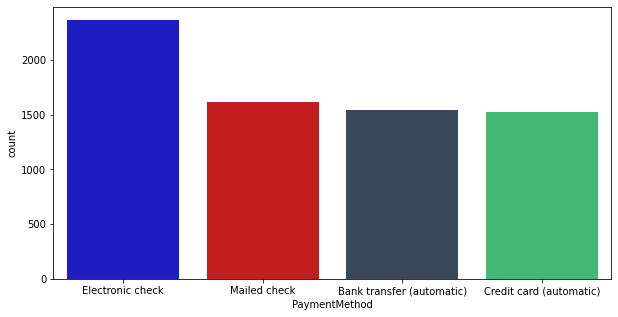

In [75]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
colors = ["#0101DF", "#DF0101","#34495e","#2ecc71"]
sns.countplot(data=telco_data,x='PaymentMethod',palette=colors)

**Total** **Charge**

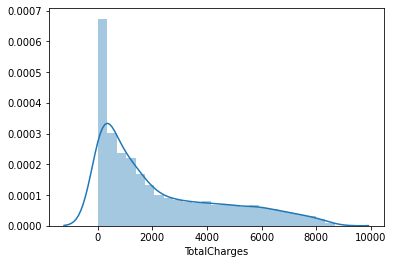

In [76]:
#Check distributions
sns.distplot(telco_data['TotalCharges'])

In [77]:
skew(telco_data['TotalCharges'])

0.9630294954586066

In [78]:
churn = telco_data[telco_data["Churn"] == 'Yes']
not_churn = telco_data[telco_data["Churn"] == 'No']

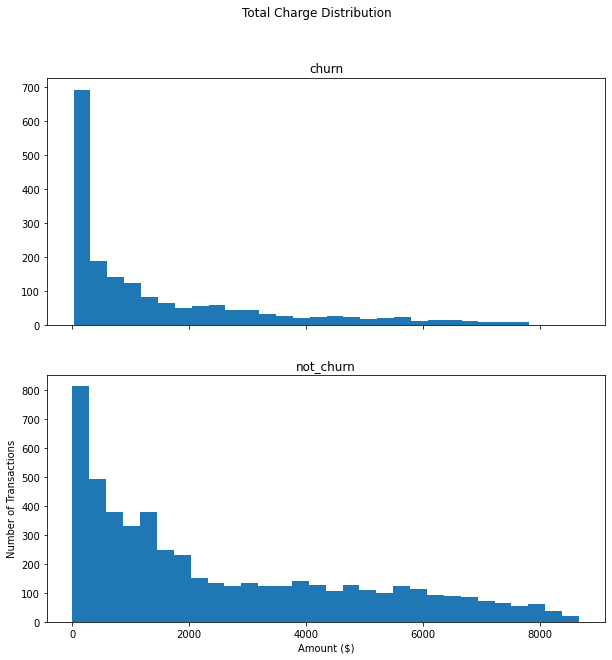

In [79]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Total Charge Distribution')
bins = 30
ax1.hist(churn.TotalCharges, bins = bins)
ax1.set_title('churn')
ax2.hist(not_churn.TotalCharges, bins = bins)
ax2.set_title('not_churn')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show();

**Monthly** **Charge**

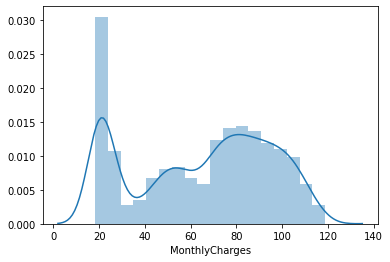

In [80]:
#Simple distribution
sns.distplot(telco_data['MonthlyCharges'])

In [81]:
#Check skewness
skew(telco_data['MonthlyCharges'])

-0.2204774644391769

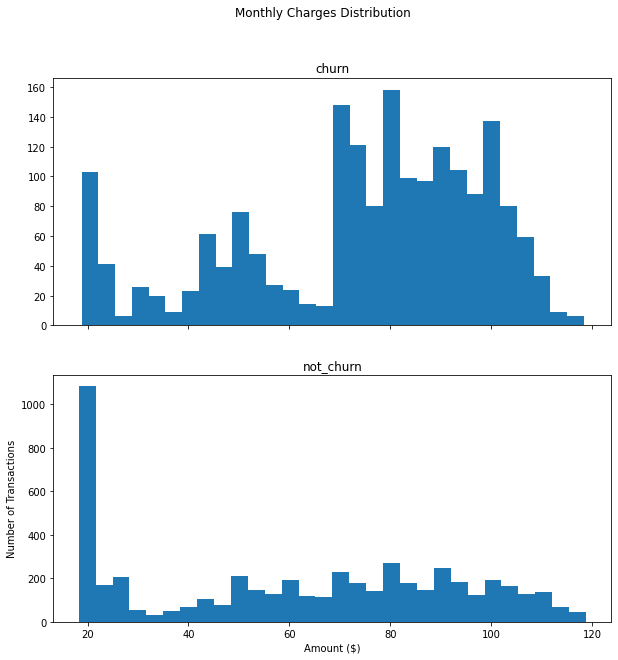

In [82]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Monthly Charges Distribution')
bins = 30
ax1.hist(churn.MonthlyCharges, bins = bins)
ax1.set_title('churn')
ax2.hist(not_churn.MonthlyCharges, bins = bins)
ax2.set_title('not_churn')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.show();

Tenure

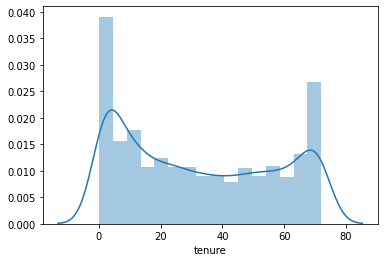

In [83]:
sns.distplot(telco_data['tenure'])

In [84]:
skew(telco_data['tenure'])

0.2394887299846216

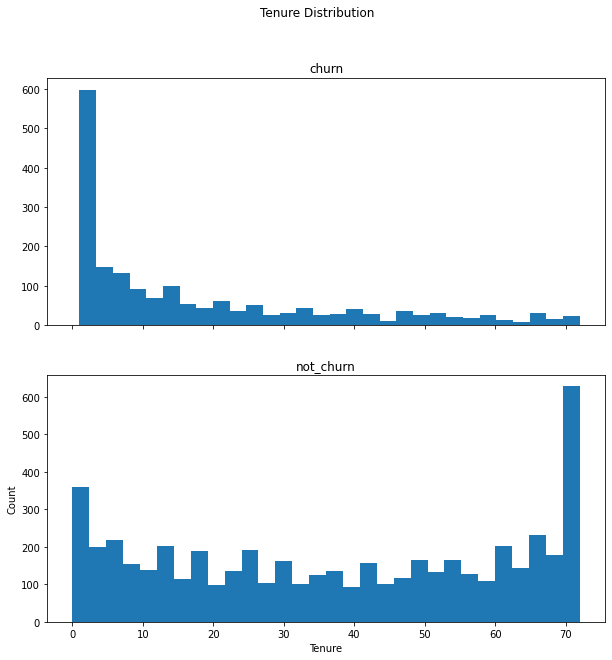

In [85]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
f.suptitle('Tenure Distribution')
bins = 30
ax1.hist(churn.tenure, bins = bins)
ax1.set_title('churn')
ax2.hist(not_churn.tenure, bins = bins)
ax2.set_title('not_churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show();

# Churn Data Analysis

In [86]:
telco_data.dtypes

customerID           object
Region               object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

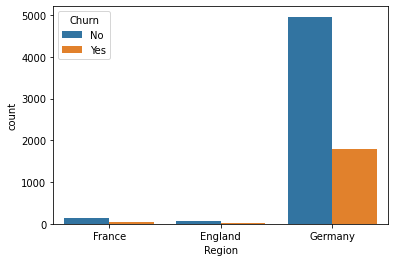

In [87]:
#Check Churn against Region
sns.countplot(data=telco_data,x='Region',hue='Churn')

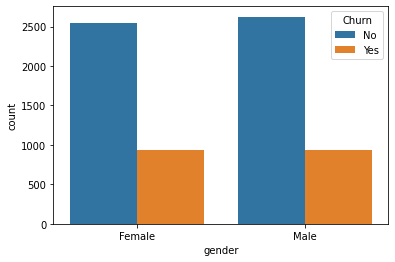

In [88]:
#Check Churn against Gender
sns.countplot(data=telco_data,x='gender',hue='Churn')

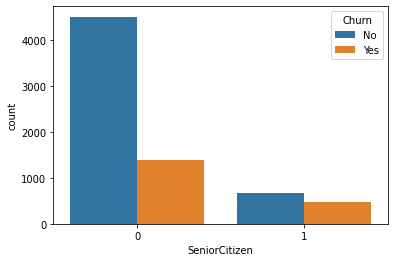

In [89]:
#Check Churn against Senior Citizen
sns.countplot(data=telco_data,x='SeniorCitizen',hue='Churn')

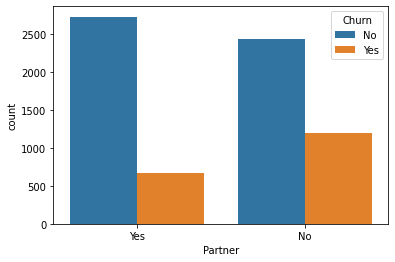

In [90]:
#Check Churn Against Partner
sns.countplot(data=telco_data,x='Partner',hue='Churn')

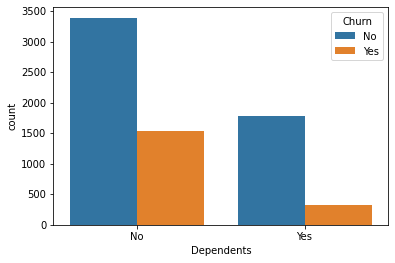

In [91]:
#Check Churn against Dependent
sns.countplot(data=telco_data,x='Dependents',hue='Churn')

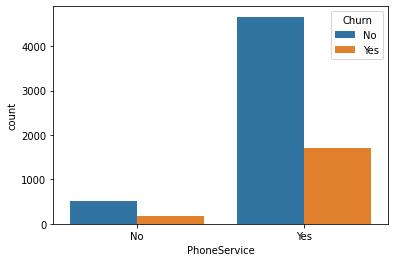

In [92]:
#Check Churn Against Phone Service
sns.countplot(data=telco_data,x='PhoneService',hue='Churn')

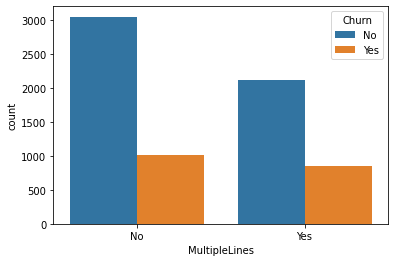

In [93]:
#Check Churn against Multiple Lines
sns.countplot(data=telco_data,x='MultipleLines',hue='Churn')

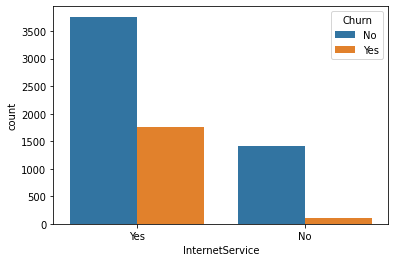

In [94]:
#Plot countplot on InternetService against Churn
sns.countplot(data=telco_data,x='InternetService',hue='Churn')

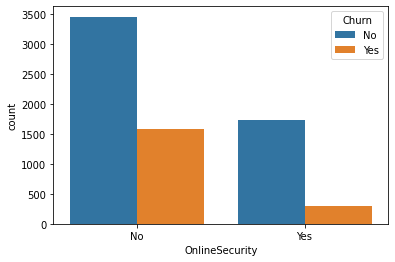

In [95]:
#Plot countplot Online Security against Churn
sns.countplot(data=telco_data,x='OnlineSecurity',hue='Churn')

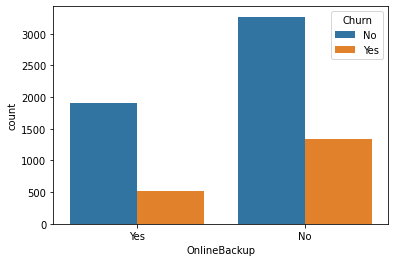

In [96]:
#Plot countplot Online Backup against Churn
sns.countplot(data=telco_data,x='OnlineBackup',hue='Churn')

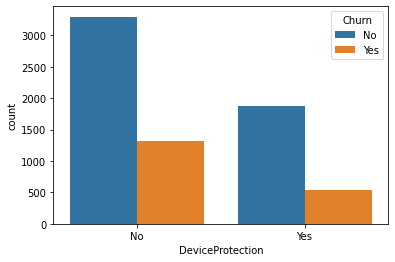

In [97]:
#Plot countplot DeviceProtection against Churn
sns.countplot(data=telco_data,x='DeviceProtection',hue='Churn')

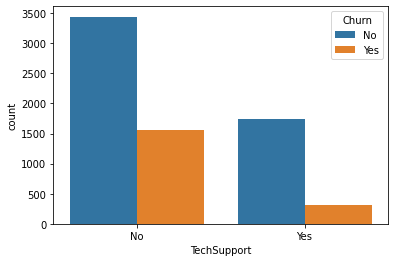

In [98]:
#Plot countplot TechSupport against Churn
sns.countplot(data=telco_data,x='TechSupport',hue='Churn')

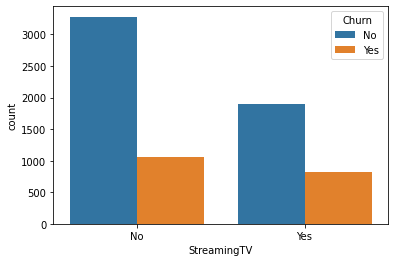

In [99]:
#Plot countplot StreamingTV against Churn
sns.countplot(data=telco_data,x='StreamingTV',hue='Churn')

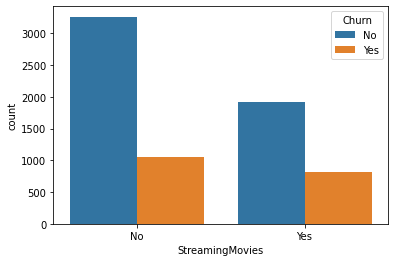

In [100]:
#Plot countplot StreamingMovies against Churn
sns.countplot(data=telco_data,x='StreamingMovies',hue='Churn')

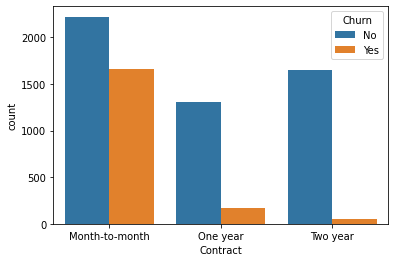

In [101]:
#Plot countplot Contract against Churn
sns.countplot(data=telco_data,x='Contract',hue='Churn')

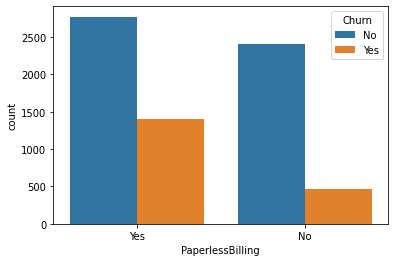

In [102]:
#Plot countplot PaperlessBilling against Churn
sns.countplot(data=telco_data,x='PaperlessBilling',hue='Churn')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

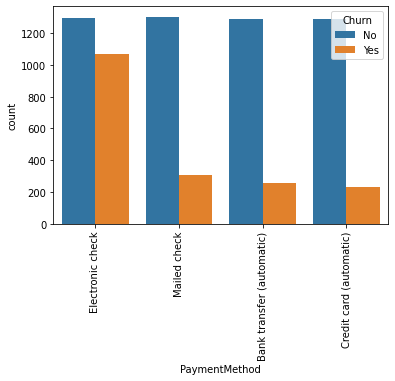

In [103]:
#Plotting count plot in Payment Method
sns.countplot(data=telco_data,x='PaymentMethod',hue='Churn')
plt.xticks(rotation=90)

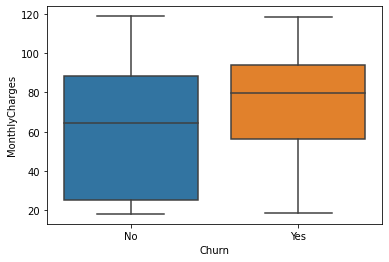

In [104]:
#Plotting Boxplot between Churn and MonthlyCharges
sns.boxplot(x='Churn',y='MonthlyCharges',data=telco_data)

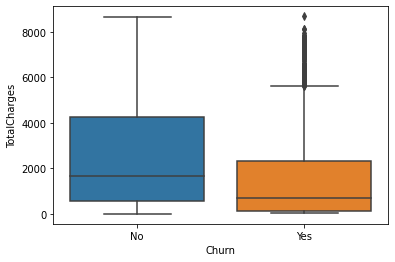

In [105]:
#Plotting Boxplot between Churn and Total Charges
sns.boxplot(x='Churn',y='TotalCharges',data=telco_data)

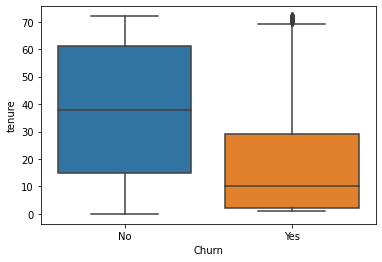

In [106]:
#Plotting tenure against Churn
sns.boxplot(x='Churn',y='tenure',data=telco_data)

# Churn Analysis per Categories

Monthly Charges

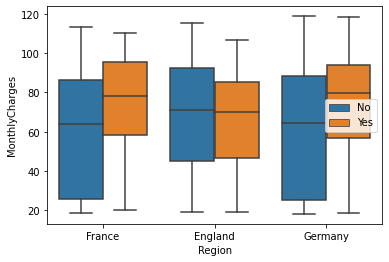

In [107]:
#Plotting Churn against Monthly Charges and Region with Boxplot
sns.boxplot(x='Region',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

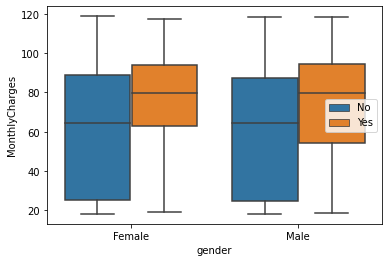

In [108]:
#Plotting Churn against Monthly Charges and gender with Boxplot
sns.boxplot(x='gender',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

In [109]:
cat_cols

['Region',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

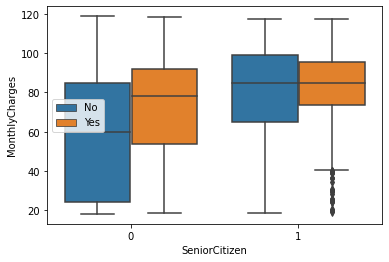

In [110]:
#Plotting Churn against Monthly Charges and SeniorCitizen with Boxplot
sns.boxplot(x='SeniorCitizen',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

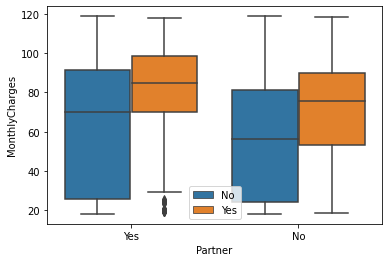

In [111]:
#Plotting Churn against Monthly Charges and Partner with Boxplot
sns.boxplot(x='Partner',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

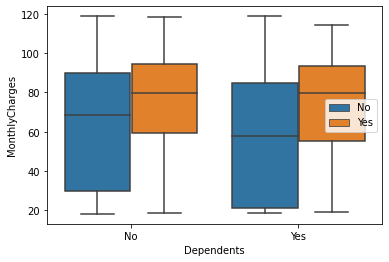

In [112]:
#Plotting Churn against Monthly Charges and Dependents with Boxplot
sns.boxplot(x='Dependents',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

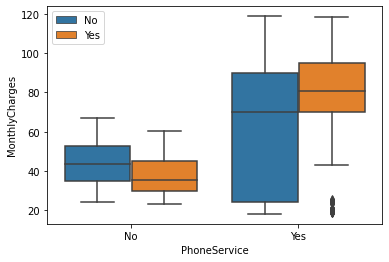

In [113]:
#Plotting Churn against Monthly Charges and PhoneService with Boxplot
sns.boxplot(x='PhoneService',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

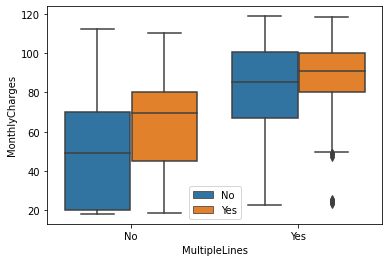

In [114]:
#Plotting Churn against Monthly Charges and MultipleLines with Boxplot
sns.boxplot(x='MultipleLines',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

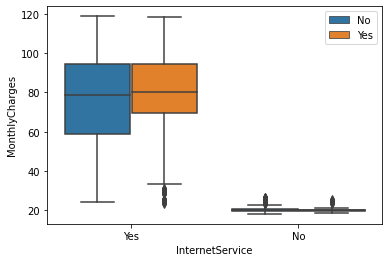

In [115]:
#Plotting Churn against Monthly Charges and InternetService with Boxplot
sns.boxplot(x='InternetService',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

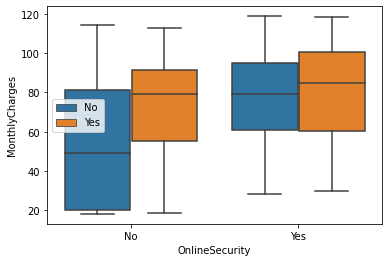

In [116]:
#Plotting Churn against Monthly Charges and OnlineSecurity with Boxplot
sns.boxplot(x='OnlineSecurity',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

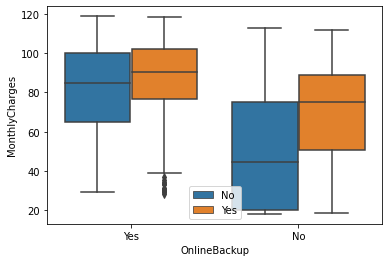

In [117]:
#Plotting Churn against Monthly Charges and OnlineBackup with Boxplot
sns.boxplot(x='OnlineBackup',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

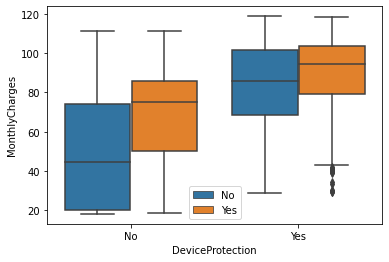

In [118]:
#Plotting Churn against Monthly Charges and DeviceProtection with Boxplot
sns.boxplot(x='DeviceProtection',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

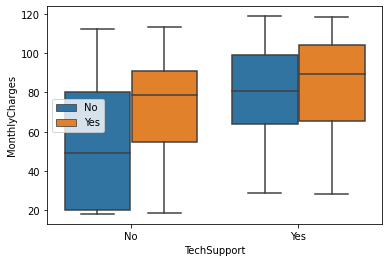

In [119]:
#Plotting Churn against Monthly Charges and TechSupport with Boxplot
sns.boxplot(x='TechSupport',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

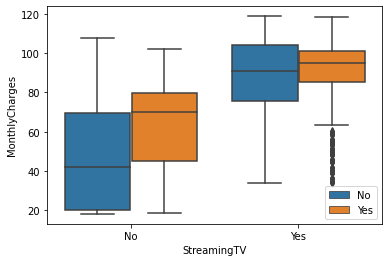

In [120]:
#Plotting Churn against Monthly Charges and StreamingTV with Boxplot
sns.boxplot(x='StreamingTV',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

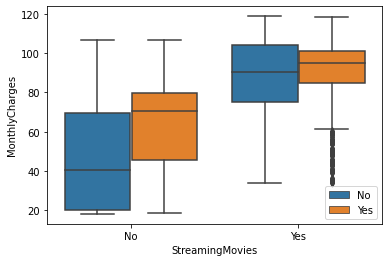

In [121]:
#Plotting Churn against Monthly Charges and StreamingMovies with Boxplot
sns.boxplot(x='StreamingMovies',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

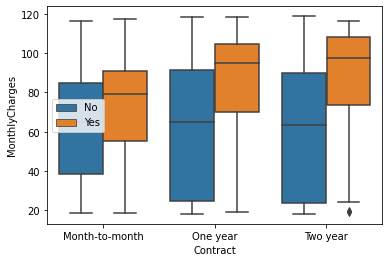

In [122]:
#Plotting Churn against Monthly Charges and Contract with Boxplot
sns.boxplot(x='Contract',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

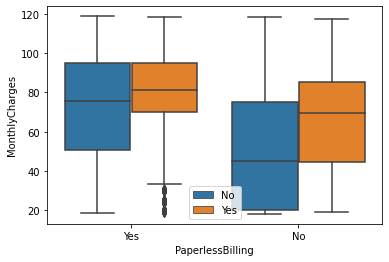

In [123]:
#Plotting Churn against Monthly Charges and PaperlessBilling with Boxplot
sns.boxplot(x='PaperlessBilling',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

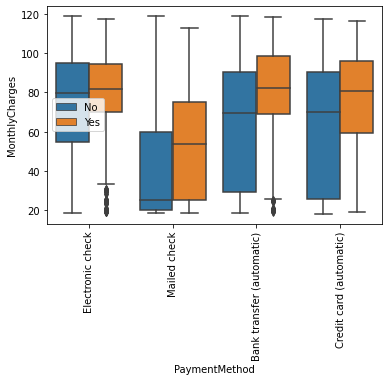

In [124]:
#Plotting Churn against Monthly Charges and PaymentMethod with Boxplot
sns.boxplot(x='PaymentMethod',y='MonthlyCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')
plt.xticks(rotation=90)

Total Charges

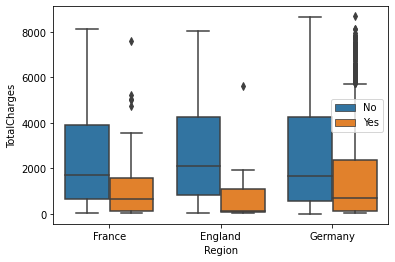

In [125]:
#Plotting Churn against Total Charges and Region with Boxplot
sns.boxplot(x='Region',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

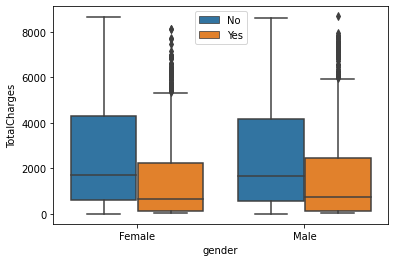

In [126]:
#Plotting Churn against Total Charges and gender with Boxplot
sns.boxplot(x='gender',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

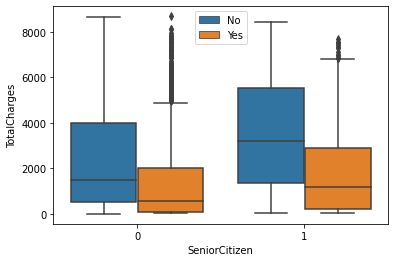

In [127]:
#Plotting Churn against TotalCharges and SeniorCitizen with Boxplot
sns.boxplot(x='SeniorCitizen',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

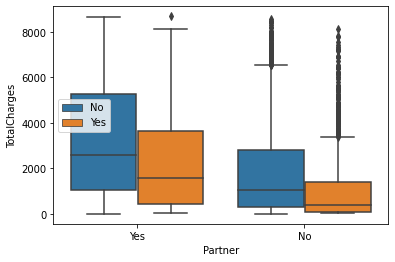

In [128]:
#Plotting Churn against Total Charges and partner with Boxplot
sns.boxplot(x='Partner',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

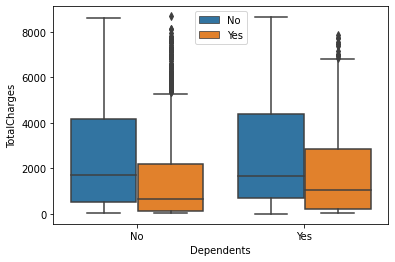

In [129]:
#Plotting Churn against Total Charges and Dependents with Boxplot
sns.boxplot(x='Dependents',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

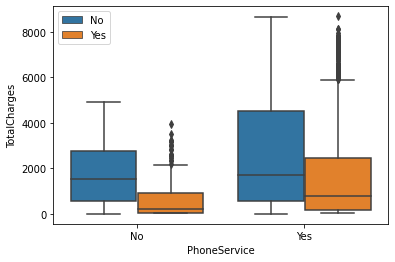

In [130]:
#Plotting Churn against Total Charges and PhoneService with Boxplot
sns.boxplot(x='PhoneService',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

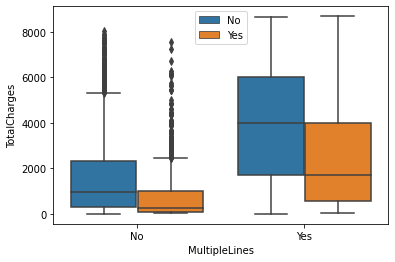

In [131]:
#Plotting Churn against Total Charges and MultipleLines with Boxplot
sns.boxplot(x='MultipleLines',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

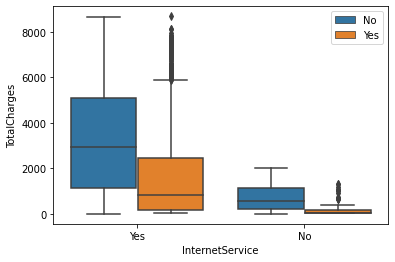

In [132]:
#Plotting Churn against Total Charges and InternetService with Boxplot
sns.boxplot(x='InternetService',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

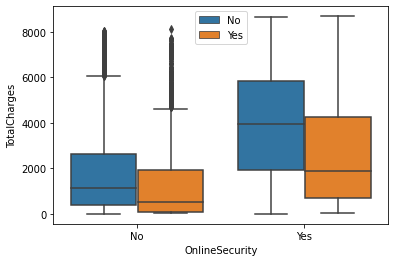

In [133]:
#Plotting Churn against Total Charges and OnlineSecurity with Boxplot
sns.boxplot(x='OnlineSecurity',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

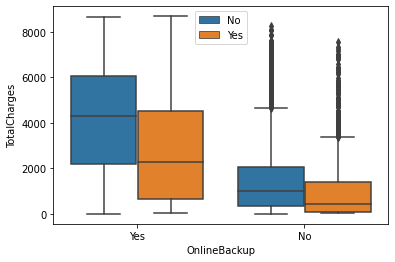

In [134]:
#Plotting Churn against Total Charges and OnlineBackup with Boxplot
sns.boxplot(x='OnlineBackup',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

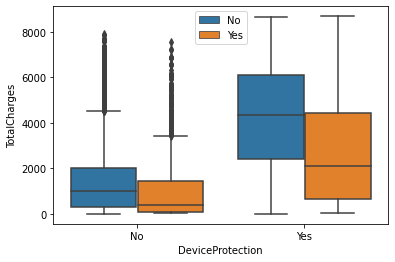

In [135]:
#Plotting Churn against Total Charges and DeviceProtection with Boxplot
sns.boxplot(x='DeviceProtection',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

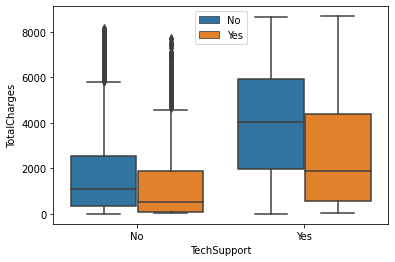

In [136]:
#Plotting Churn against Total Charges and TechSupport with Boxplot
sns.boxplot(x='TechSupport',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

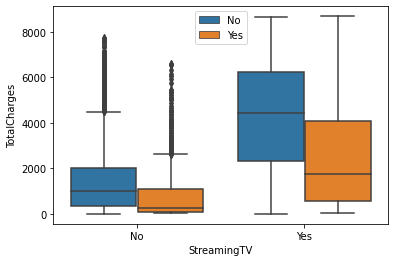

In [137]:
#Plotting Churn against Total Charges and StreamingTV with Boxplot
sns.boxplot(x='StreamingTV',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

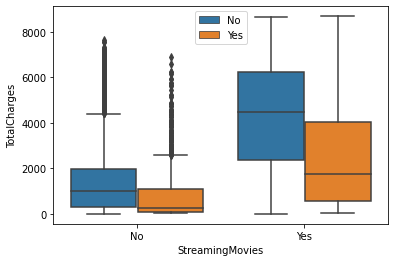

In [138]:
#Plotting Churn against Total Charges and StreamingMovies with Boxplot
sns.boxplot(x='StreamingMovies',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

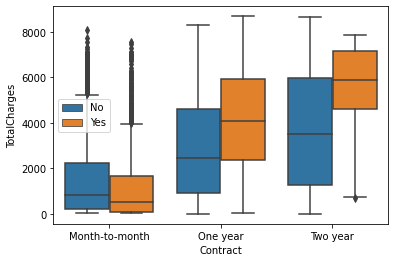

In [139]:
#Plotting Churn against Total Charges and Contract with Boxplot
sns.boxplot(x='Contract',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

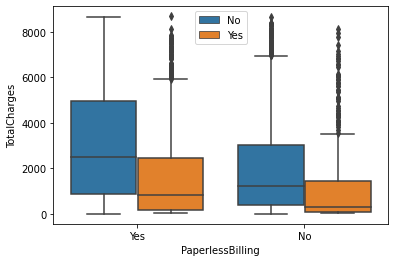

In [140]:
#Plotting Churn against Total Charges and PaperlessBilling with Boxplot
sns.boxplot(x='PaperlessBilling',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

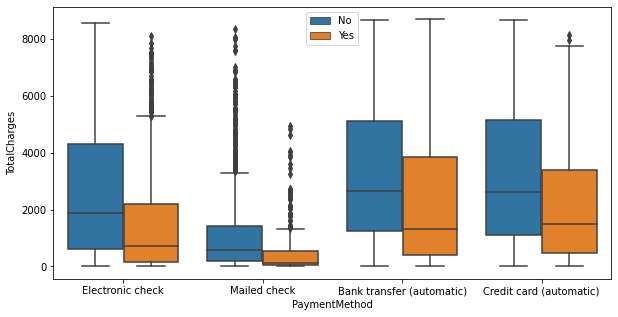

In [141]:
#Plotting Churn against Total Charges and PaymentMethod with Boxplot
fig, axes = plt.subplots(1, 1, figsize=(10,5))
sns.boxplot(x='PaymentMethod',y='TotalCharges',data=telco_data,hue='Churn')
plt.legend(loc='best')

Tenure

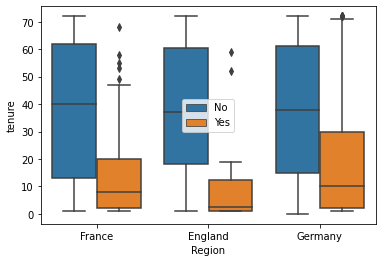

In [142]:
#Plotting Churn against tenure and Region with Boxplot
sns.boxplot(x='Region',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

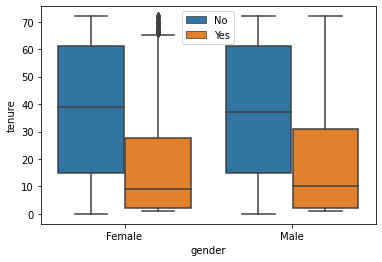

In [143]:
#Plotting Churn against tenure and gender with Boxplot
sns.boxplot(x='gender',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

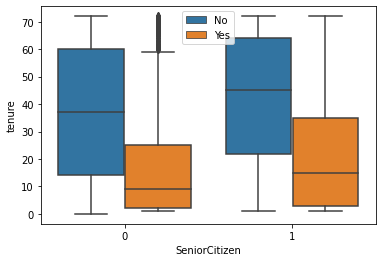

In [144]:
#Plotting Churn against SeniorCitizen and tenure with Boxplot
sns.boxplot(x='SeniorCitizen',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

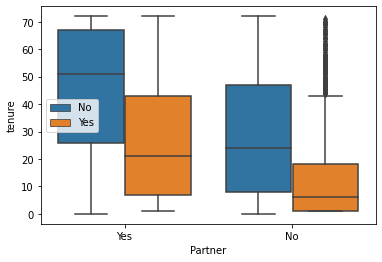

In [145]:
#Plotting Churn against tenure and partner with Boxplot
sns.boxplot(x='Partner',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

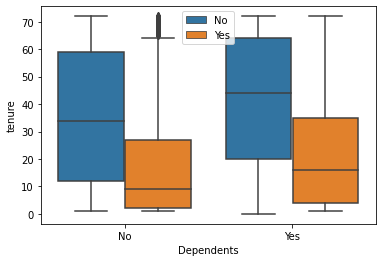

In [146]:
#Plotting Churn against tenure and Dependents with Boxplot
sns.boxplot(x='Dependents',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

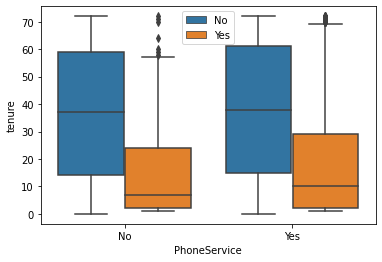

In [147]:
#Plotting Churn against tenure and PhoneService with Boxplot
sns.boxplot(x='PhoneService',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

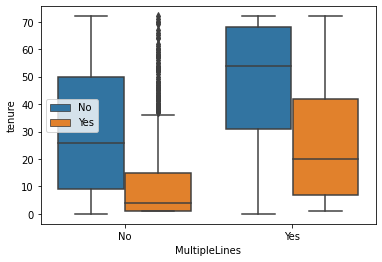

In [148]:
#Plotting Churn against tenure and MultipleLines with Boxplot
sns.boxplot(x='MultipleLines',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

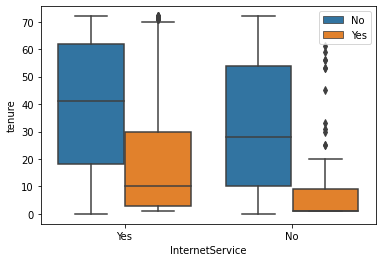

In [149]:
#Plotting Churn against tenure and InternetService with Boxplot
sns.boxplot(x='InternetService',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

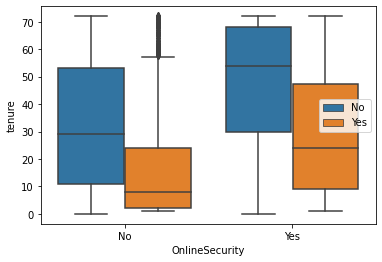

In [150]:
#Plotting Churn against tenure and OnlineSecurity with Boxplot
sns.boxplot(x='OnlineSecurity',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

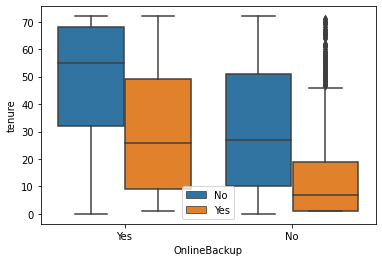

In [151]:
#Plotting Churn against tenure and OnlineBackup with Boxplot
sns.boxplot(x='OnlineBackup',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

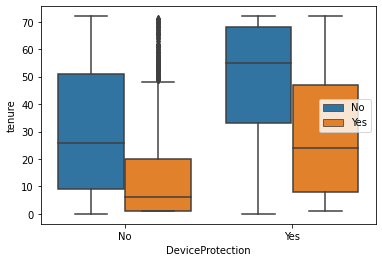

In [152]:
#Plotting Churn against tenure and DeviceProtection with Boxplot
sns.boxplot(x='DeviceProtection',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

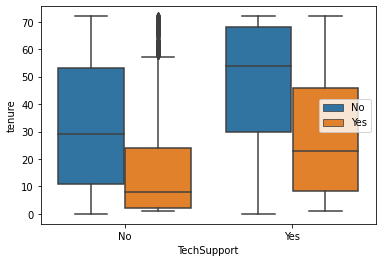

In [153]:
#Plotting Churn against tenure and TechSupport with Boxplot
sns.boxplot(x='TechSupport',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

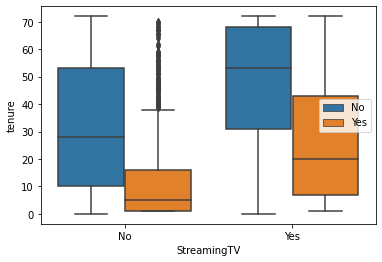

In [154]:
#Plotting Churn against tenure and StreamingTV with Boxplot
sns.boxplot(x='StreamingTV',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

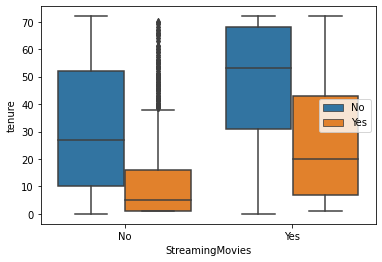

In [155]:
#Plotting Churn against tenure and StreamingMovies with Boxplot
sns.boxplot(x='StreamingMovies',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

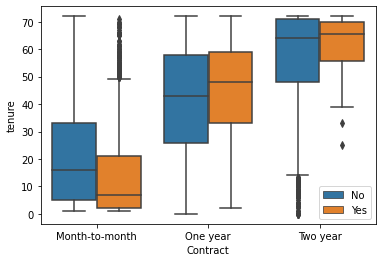

In [156]:
#Plotting Churn against tenure and Contract with Boxplot
sns.boxplot(x='Contract',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

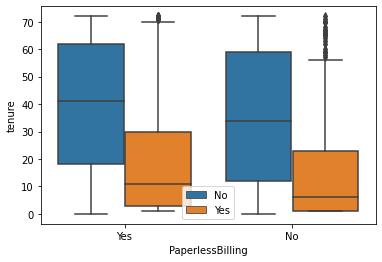

In [157]:
#Plotting Churn against tenure and PaperlessBilling with Boxplot
sns.boxplot(x='PaperlessBilling',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

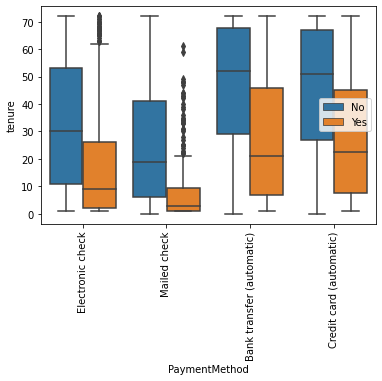

In [158]:
#Plotting Churn against tenure and PaymentMethod with Boxplot
sns.boxplot(x='PaymentMethod',y='tenure',data=telco_data,hue='Churn')
plt.legend(loc='best')
plt.xticks(rotation=90)

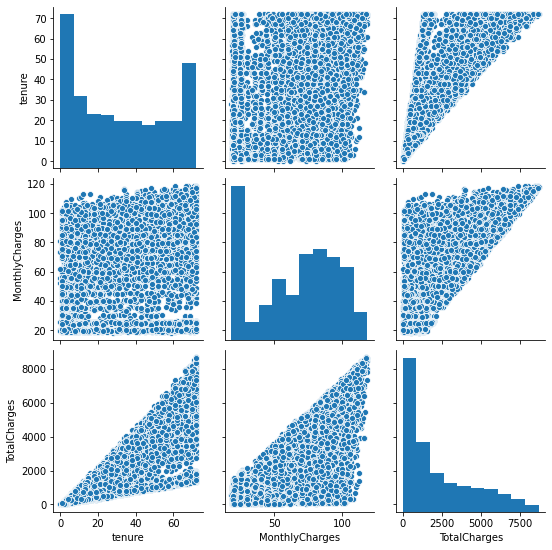

In [159]:
#Plot Pairplot
sns.pairplot(telco_data[num_cols])

# Feature Engineering

In [160]:
#Check data head
telco_data.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
#Drop customerID column
telco_data = telco_data.drop(['customerID'],axis=1)

In [162]:
telco_data.head()

,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,France,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,France,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,France,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,France,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,France,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Categorical Features

In [163]:
#Encoding country
country_enc = pd.get_dummies(telco_data['Region'],prefix='Region')

In [164]:
#Encoding gender
gender_enc = pd.get_dummies(telco_data['gender'],prefix='Gender')

In [165]:
#Encoding contract
contract_enc = pd.get_dummies(telco_data['Contract'],prefix='Contract')

In [166]:
#Encoding Payment
payment_enc = pd.get_dummies(telco_data['PaymentMethod'],prefix='Payment')

In [167]:
#Concatenate the data
telco_data = pd.concat([telco_data,country_enc,gender_enc,contract_enc,payment_enc],axis=1)

In [168]:
#Drop the column
telco_data = telco_data.drop(['Region','gender','Contract','PaymentMethod'],axis=1)

In [169]:
#Check telco_data again
columns = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in columns:
  telco_data[col] = telco_data[col].apply(lambda x : 1 if x=='Yes' else 0)

In [170]:
telco_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,1,0,0,0,0,1,0


Numerical Features

*   Total Charges



In [171]:
#TotalCharges change 0 values
telco_data['TotalCharges'] = telco_data['TotalCharges'].replace(0,telco_data['TotalCharges'].mean())

In [172]:
telco_data['log_totalcharges'] = np.log(telco_data['TotalCharges'])

*   Monthly Charges




In [173]:
telco_data['log_monthlycharges'] = np.log(telco_data['MonthlyCharges'])

*   Tenure




In [174]:
#Tenure will be binned
telco_data['tenure_cat'] = pd.qcut(telco_data['tenure'],q=3,labels=['Low','Mid','High'])

In [175]:
telco_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,log_totalcharges,log_monthlycharges,tenure_cat
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,1,0,0,0,0,1,0,3.396185,3.396185,Low
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,1,0,0,0,0,1,7.544068,4.042174,Mid
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,0,1,1,0,0,0,0,0,1,4.683519,3.986202,Low
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,1,0,0,0,7.517928,3.744787,Mid
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,1,0,0,0,0,1,0,5.021575,4.258446,Low


In [176]:
tenure_cat_enc = pd.get_dummies(telco_data['tenure_cat'],prefix='tenure')

In [177]:
telco_data = pd.concat([telco_data,tenure_cat_enc],axis=1)

In [178]:
telco_data = telco_data.drop('tenure_cat',axis=1)

In [179]:
telco_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,log_totalcharges,log_monthlycharges,tenure_Low,tenure_Mid,tenure_High
0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,1,0,0,0,0,1,0,3.396185,3.396185,1,0,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,1,0,0,0,0,1,7.544068,4.042174,0,1,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,0,1,1,0,0,0,0,0,1,4.683519,3.986202,1,0,0
3,0,0,0,45,0,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,0,1,0,1,0,0,0,7.517928,3.744787,0,1,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,1,0,0,0,0,1,0,5.021575,4.258446,1,0,0


Heat Map Correlation

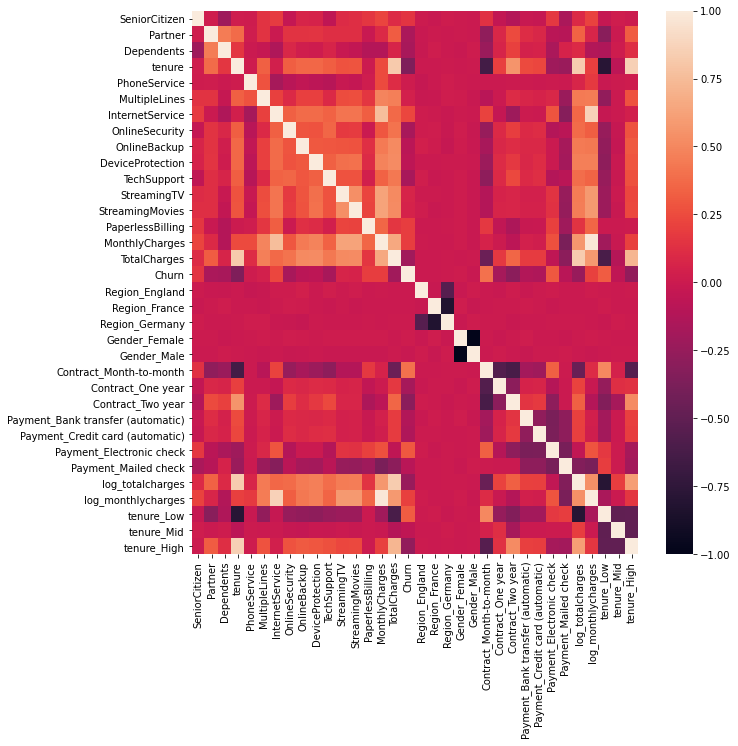

In [180]:
plt.subplots(figsize=(10,10))
sns.heatmap(telco_data.corr())

In [181]:
telco_data.shape

(7043, 34)

In [182]:
#Check correlation of data final
telco_data.corr()[np.abs(telco_data.corr())>=0.45]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check,log_totalcharges,log_monthlycharges,tenure_Low,tenure_Mid,tenure_High
SeniorCitizen,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,NaN,1.000000,0.452676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,0.452676,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824761,NaN,NaN,NaN,NaN,NaN,NaN,-0.645561,NaN,0.558533,NaN,NaN,NaN,NaN,0.830735,NaN,-0.782142,NaN,0.858873
PhoneService,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490434,0.468690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.763557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865821,NaN,NaN,NaN
OnlineSecurity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.509691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.482692,0.522462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463152,0.466029,NaN,NaN,NaN


In [183]:
#Drop correlated features
telco_data = telco_data.drop(['Partner','tenure','TotalCharges','MonthlyCharges','MultipleLines','InternetService',
                              'DeviceProtection','StreamingTV','StreamingMovies','Contract_One year','Contract_Two year',
                              'tenure_Low','tenure_High','Region_England','Region_France','log_totalcharges',
                              'Gender_Female','Payment_Credit card (automatic)'],axis=1)

In [184]:
telco_data.shape

(7043, 16)

# Preprocessing Data

In [185]:
#Import Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [186]:
telco_data['scaled_log_monthlycharges'] = ss.fit_transform(telco_data[['log_monthlycharges']])

In [187]:
#Drop log_monthlycharges column
telco_data = telco_data.drop(['log_monthlycharges'],axis=1)

# Oversampling Imbalance Target Variable
According to the Exploratory Data Analysis, there's an imbalanced target variable. So, it must be oversampled

In [188]:
#Import resample packages
from sklearn.utils import resample
df_churn = telco_data[telco_data['Churn']==1]
df_nochurn = telco_data[telco_data['Churn']==0]

In [189]:
#Resample data
df_churn_res = resample(df_churn,replace=True,n_samples=5174)

In [190]:
#Concat the data
telco_data_updated = pd.concat([df_churn_res,df_nochurn]).reset_index(drop=True)

In [191]:
telco_data_updated.head()

,SeniorCitizen,Dependents,PhoneService,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,Churn,Region_Germany,Gender_Male,Contract_Month-to-month,Payment_Bank transfer (automatic),Payment_Electronic check,Payment_Mailed check,tenure_Mid,scaled_log_monthlycharges
0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1.003836
1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0.371558
2,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,-1.367961
3,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0.394366
4,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0.613199


In [192]:
telco_data_updated.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

# Feature Importance by Random Forest Classifier

In [193]:
#Make X as features and y as target variable
X = telco_data_updated.drop('Churn',axis=1)
y = telco_data_updated['Churn']

In [194]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [195]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [196]:
importances = clf.feature_importances_

In [197]:
feat_importances = pd.DataFrame({'Variable':X.columns,'Importance':importances})

In [198]:
#Check Head
feat_importances.sort_values(by='Importance',ascending=False)

,Variable,Importance
14,scaled_log_monthlycharges,0.491681
9,Contract_Month-to-month,0.157269
11,Payment_Electronic check,0.052227
3,OnlineSecurity,0.036415
8,Gender_Male,0.032781
13,tenure_Mid,0.032428
5,TechSupport,0.032253
6,PaperlessBilling,0.031999
4,OnlineBackup,0.028019
1,Dependents,0.027162


# Data Modelling

*   Separate Train and Test Data



In [199]:
#Separate Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

*   Import Metrics Packages



In [200]:
from sklearn.metrics import accuracy_score,precision_score,plot_confusion_matrix,classification_report

Used the linear classifier according to EDA, there's a features that have linear correlation to target variable

*   Logistic Regression


In [201]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
y_pred_re = lr.predict(X_test)

In [203]:
#Check accuracy score
print('The accuracy score is {}'.format(round(accuracy_score(y_test,y_pred_re),2)))
print('The precision score is {}'.format(round(precision_score(y_test,y_pred_re),2)))

The accuracy score is 0.75
The precision score is 0.75


Text(0.5, 1.0, 'Confusion Matrix with Logistic Regression')

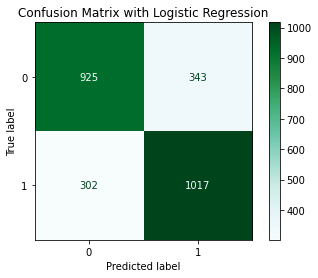

In [204]:
#Confusion Matrix Check
plot_confusion_matrix(lr,X_test,y_test,cmap='BuGn',values_format='.0f')
plt.title('Confusion Matrix with Logistic Regression')

In [205]:
print(classification_report(y_test,y_pred_re))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1268
           1       0.75      0.77      0.76      1319

    accuracy                           0.75      2587
   macro avg       0.75      0.75      0.75      2587
weighted avg       0.75      0.75      0.75      2587



*   Support Vector Machine



In [206]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
y_pred_SVC = svc.predict(X_test)

In [208]:
#Check accuracy score
print('The accuracy score is {}'.format(round(accuracy_score(y_test,y_pred_SVC),2)))
print('The precision score is {}'.format(round(precision_score(y_test,y_pred_SVC),2)))

The accuracy score is 0.77
The precision score is 0.75


Text(0.5, 1.0, 'Confusion Matrix with Support Vector Machine')

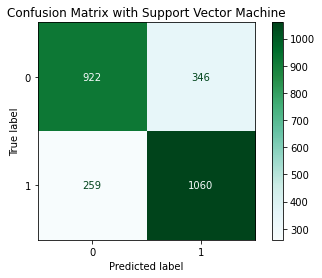

In [209]:
#Confusion Matrix Check
plot_confusion_matrix(svc,X_test,y_test,cmap='BuGn',values_format='.0f')
plt.title('Confusion Matrix with Support Vector Machine')

In [210]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1268
           1       0.75      0.80      0.78      1319

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587



# Hyperparameter Tuning
This case will be used Random Search for Hyperparameter Tuning

In [211]:
from sklearn.model_selection import RandomizedSearchCV

In [212]:
#Define hyperparameter
params_dist = { 'C' : [1e-3,1e-2,1e-1,1,10,100],
               'gamma': [1e-3,0.01,0.1,1,10,100]}

In [213]:
#Define Random Search
svc_random = RandomizedSearchCV(estimator=svc,param_distributions=params_dist,refit=True,cv=3,return_train_score=True)

In [214]:
#Fit the data
svc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [215]:
#Check best parameter
svc_random.best_params_

{'C': 100, 'gamma': 1}

In [216]:
#Predict the data
svc_random_predict = svc_random.predict(X_test)

In [217]:
#Check score
print(accuracy_score(y_test,svc_random_predict))
print(precision_score(y_test,svc_random_predict))

0.8272129880170082
0.799039780521262


Text(0.5, 1.0, 'Confusion Matrix with Support Vector after Grid Search')

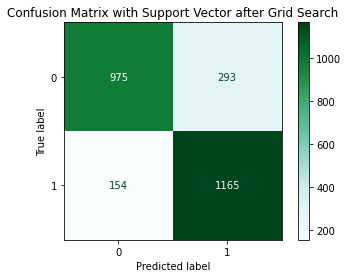

In [218]:
#Plot Confusion Matrix
plot_confusion_matrix(svc_random,X_test,y_test,cmap='BuGn',values_format='.0f')
plt.title('Confusion Matrix with Support Vector after Random Search')

In [219]:
print(classification_report(y_test,svc_random_predict))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1268
           1       0.80      0.88      0.84      1319

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587



#Is the model overfit or not?

In [220]:
y_train_pred = svc_random.predict(X_train)

In [221]:
#Check Accuracy Score
acc_train = accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test,svc_random_predict)
print(acc_train)
print(acc_test)

0.8961474036850922
0.8272129880170082


In [222]:
print('The model is overfitted with gap between train and test model around {:.2f}%'.format(round((acc_train-acc_test)*100,2)))

The model is overfitted with gap between train and test model around 6.89%
